# Kmeans input configurations sorted by size

In this example we will expand the grid exploration to all possible combinations within a dataset. For this we will define the boundaries of the grid partitions and also the number of centroids, depending on the number of datapoints we have in our dataset. Then, we order the series of configurations in ascending order by the grid size, helping us to interpret the output in a more rational way. 

As a reminder, we run a very simple set of configurations to explore the parameter space on three variables: the number of centers (K), the grid size -or partition- in the x-axis (Nx) and the grid size in the y-axis (Ny) where the centroids are allocated.  

To this end, we load some basic libraries for plotting the output and also to run the algorithm based on python built-in modules: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from KmeansTrace import KmeansTrace
from DataGrid import DataGrid

We define a function that runs the algorithm on a particular dataset. It also calculates basic diagnostics related to the number of iterations and the inertia (the sum of distances to the nearest cluster center) thanks to the built-in Kmeans algorithm routine. 

In [2]:
def KmeansGrid(Data2D, K, grid):
    
    listeTraceLabels  = []
    listeTraceCenters = []
    listeTraceInertia = []
    listeTraceNbIter  = []
    
    for c in grid.get_grille():

        aKmeans  = KmeansTrace(Data2D, K, c, grid)
        Labels, Centers, Inertia, NbIter = aKmeans.getAll()
        listeTraceLabels.append(Labels)  
        listeTraceCenters.append(Centers) 
        listeTraceInertia.append(Inertia) 
        listeTraceNbIter.append(NbIter) 

    return listeTraceLabels, listeTraceCenters, listeTraceInertia, listeTraceNbIter

We then define a set of arrays to store all the output diagnostics and also another set of arrays to store the grid partitions and most important, the grid size. The grid size is related to the maximum number of centroids we can place, and in turn, the number of centroids is related to the number of datapoints. So based on this we define the boundaries over which the grid partitions span. With the use of pandas, we sort the grids by its size in ascending order. Based on that we run the K-means algorithm over the ensemble of configurations. 

In [3]:
if __name__ == "__main__":

    import time
    start_time = time.time()

    # Arrays to store the output of the K-means calculation
    hgrams=[]
    cargo_labels=[]
    cargo_iterations=[]
    cargo_inertia=[]
    cargo_solutions=[]
    cargo_config=[]
    counter=1
    
    # Arrays to store all possible configurations of Dx, Dy, K
    gridx=[]
    gridy=[]
    gridk=[]
    gridsize=[]
    
    # Read the input data and count the datapoints to define the grid boundaries
    filename = './data/UnevenlySizedBlobs.csv' 
    data_points = pd.read_csv(filename, sep='\t', header=None)
    datacount   = len(data_points)
    
    # Loops with boundaries depending on the number of points in the dataset. 
    for i in range(2,datacount):
        dlim = int(datacount/i)
        for j in range(1,dlim+1):
            klim = (i*j)-1
            for l in range(2,klim+1):

                K = l
                nx, ny = i,j
                index = nx*ny
                gridx.append(nx)
                gridy.append(ny)
                gridk.append(K)
                gridsize.append(index)
  
    # Pandas to store and sort the values by its gridsize
    configurations=pd.DataFrame({"nx":gridx[:],"ny":gridy[:],"nk":gridk[:],"gridsize":gridsize[:]})
    config_sorted=configurations.sort_values(['gridsize'],ascending=True)

    
    # Number of configurations from the sorted gridsizes
    number_of_config=3
    for i in range (0,number_of_config):
    
                K = config_sorted.nk[i]
                nx, ny = config_sorted.nx[i],config_sorted.ny[i]

#                # Data reading
#                #filename = './data/UnequalVar.csv'
#                #filename = './data/Mixture2D.csv'              #----> nbreuses convergences avec K =3 (un peu moins avec K=2)
                filename = './data/UnevenlySizedBlobs.csv'      #----> nbreuses convergences avec K =3 (un seule avec K =2)
                #filename = './data/AnisotropBlob.csv'
                df       = pd.read_csv(filename, sep='\t', header=None)
                Data2D   = df.values
#            
                # All about the digital grid for center init of kmeans
                grid = DataGrid(Data2D, nx, ny, K)
            
                # Kmeans computation with center init on the grid
                listeTraceLabels, listeTraceCenters, listeTraceInertia, listeTraceNbIter = KmeansGrid(Data2D, K, grid)
                
                hgrams.append(np.histogram(listeTraceNbIter, density=True, bins=np.max(listeTraceNbIter)))
                
                # Decrease the decimals for memory optimization
                shortInertia=list(set(listeTraceInertia))
                shorter=np.round(shortInertia,1)
                
                # Storage of the output diagnostics in arrays
                cargo_iterations.append(listeTraceNbIter)
                cargo_labels.append(listeTraceLabels)
                cargo_inertia.append(shorter)
                cargo_solutions.append(len(list(set(listeTraceInertia))))
                cargo_config.append(str(l)+str(i)+str(j))
                counter=counter+1

Once the algorithm is run we can plot the grid size of each one of the configurations. First, we can plot the original size (in the y-axis) before sorting out the configurations (sorted as the loop runs in the x-axis): 

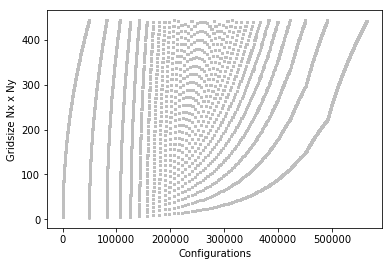

In [4]:
plt.figure()
thex=range(0,len(gridsize))
plt.plot(thex,configurations.gridsize[:], ls='none', marker='o', markersize=2, color=(0.75, 0.75, 0.75))
plt.xlabel('Configurations', fontsize=10)
plt.ylabel('Gridsize Nx x Ny', fontsize=10)

The loop restarts the partition on one of the dimensions each time one of the loops ends, so we do not have any logical sequence on the distribution of the configurations. Once the sorting is done, we can rearrange the sequence of configurations following its size as follows: 

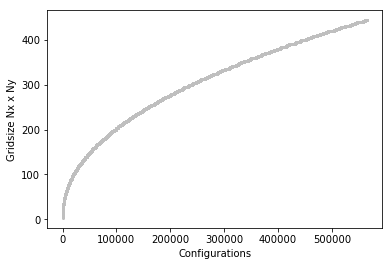

In [5]:
plt.figure()
thex=range(0,len(gridsize))
plt.plot(thex,config_sorted.gridsize[:], ls='none', marker='o', markersize=2, color=(0.75, 0.75, 0.75))
plt.xlabel('Configurations', fontsize=10)
plt.ylabel('Gridsize Nx x Ny', fontsize=10)

Where the generated configurations follow an established particular order.  